In [ ]:
pip install bs4

In [ ]:
pip install seaborn

In [11]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
import datetime
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlparse, parse_qs, urlunparse, urlencode

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

# Base URL with a year parameter
base_url = 'https://www.imdb.com/search/title/?year='

movie_array = []

# Define a list of years to loop through
start_year = 2010
end_year = 2012
years = range(start_year, end_year)

max_requests = 70  # Set the maximum number of requests allowed
request_count = 0
pages = np.arange(1, 251, 50)

for year in years:
    #print(year)
    # sleep(randint(8,15))
    for page in pages:
        # sleep(randint(8,15))
        #print(year)
        # concatenating the url and creating a target url
        url_year = base_url + str(year) + '&start=' + str(page)
        #print(url_year)
        try:
            response = requests.get(url_year, headers=HEADERS)
            #print(response)
    
            # throw warning for status codes that are not 200
            if response.status_code != 200:
                warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            soup = BeautifulSoup(response.text, 'lxml')
            request_count += 1
      
            # check for max request
            if request_count > max_requests:
                break
                  
            # sleep(randint(8,15))
            container = soup.findAll('li', class_="ipc-metadata-list-summary-item")
            

            for moviecontainer in container:
                score= moviecontainer.find('span',class_="metacritic-score-box")
                #print(score)
                if score is not None:
                 
                  title= moviecontainer.h3.text.strip('-,() ')[3:]
                  #print(title)
                  metascore=score.text.strip()
                  #print(metascore)       
                  
#                   #year_o= moviecontainer.find(class_='lister-item-year').text.strip('-,() ')[-4:]
                  year= moviecontainer.find('span',class_="dli-title-metadata-item").text
                  #print(year)
        
                 
                  rating= moviecontainer.find('span',class_="ipc-rating-star--imdb").text.strip('-,() ')[0:4]
                  #print(rating)
        
#                   # votes = moviecontainer.find('span', {'name': 'nv'}).text.strip() 
                  votes = moviecontainer.find('div', class_="ipc-rating-star--voteCount")
                  #print(votes)
                  if votes:
                      votes = moviecontainer.find('span', class_="ipc-rating-star--voteCount").text.strip('-,() ')[-6:]
                      #print(votes)
                  movie_array.append([title,year,metascore,rating,votes])
                  #print(movie_array)
            
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")

df = pd.DataFrame(movie_array, columns=['Title','Year','Metascore','Rating','Votes'])
df.head(20)


,Title,Year,Metascore,Rating,Votes
0,Despicable Me,2010,72,7.6,None
1,Inception,2010,74,8.8,None
2,Shutter Island,2010,63,8.2,None
3,Incendies,2010,80,8.3,None
4,Grown Ups,2010,30,6.0,None
5,Percy Jackson & the Olympians: The Lightning ...,2010,47,5.9,None
6,Black Swan,2010,79,8.0,None
7,The Town,2010,74,7.5,None
8,The Other Guys,2010,64,6.6,None
9,Piranha 3D,2010,53,5.5,None


In [13]:
df.to_csv('web-scrapping-movies1-raw.csv', encoding='utf-8')

In [15]:

df.head()
#df.to_csv('web-scrapping-movies1.csv', encoding='utf-8')

,Title,Year,Metascore,Rating,Votes
0,Despicable Me,2010,72,7.6,None
1,Inception,2010,74,8.8,None
2,Shutter Island,2010,63,8.2,None
3,Incendies,2010,80,8.3,None
4,Grown Ups,2010,30,6.0,None


In [ ]:
!pip install boto3

In [ ]:
import boto3

def upload_to_s3(file_name, bucket_name, object_name=None):
    object_name = object_name
    s3_client = boto3.client('s3')
    s3_client.upload_file(file_name, bucket_name, object_name)
    return True

file_name = 'Your_File_Name' 
bucket_name = 'bucket_name'  # Your S3 bucket name
object_name = 'object_name'  # The name of the object in S3 (can include folder path)


upload_success = upload_to_s3(file_name, bucket_name, object_name)
if upload_success:
    print(f"File {file_name} uploaded successfully to {bucket_name}/{object_name}")
else:
    print("File upload failed")


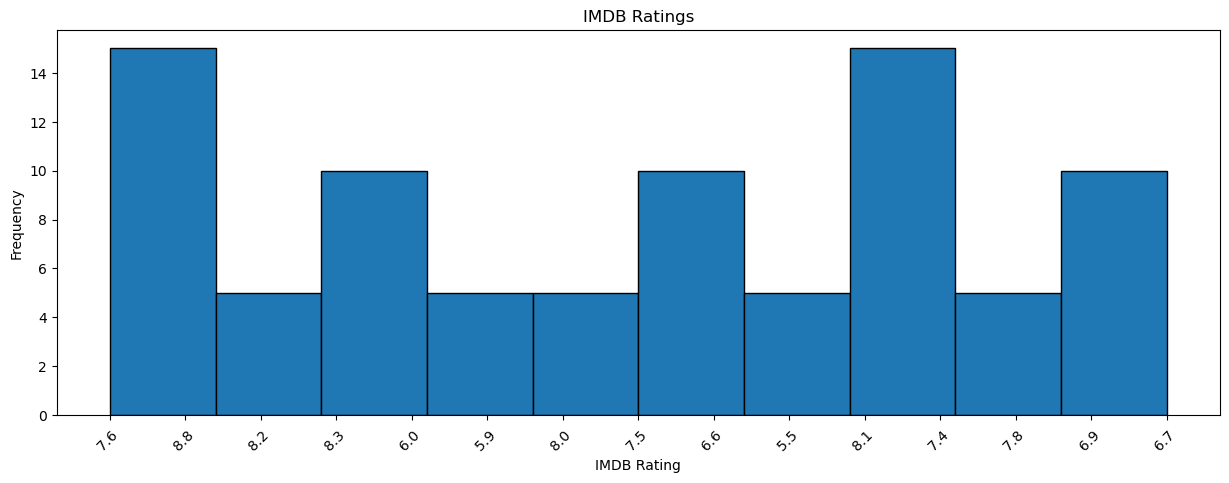

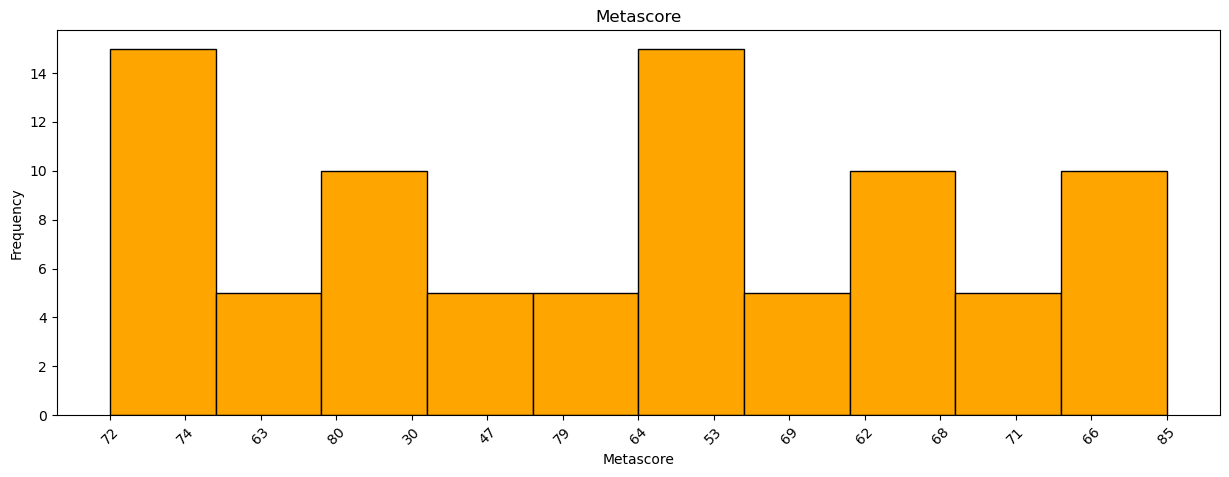

In [9]:
# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for IMDb ratings
plt.hist(df['Rating'], bins=10, edgecolor='k')
plt.title('IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# Histogram for Metascore ratings
plt.figure(figsize=(15, 5))
plt.hist(df['Metascore'], bins=10, edgecolor='k', color='orange')
plt.title('Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()





